In [682]:
# data source: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market?select=NY-House-Dataset.csv

In [683]:
# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [684]:
# load the dataset
df = pd.read_csv('NY-House-Dataset.csv')

In [685]:
# display the first few rows of the dataset
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [686]:
# get basic statistics and info about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


Data Cleaning

Drop unnecessary columns

In [687]:
# drop unnecessary columns
df=df.drop(['BROKERTITLE','ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS','LATITUDE','LONGITUDE'],axis=1)

df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


Renaming columns

In [688]:
# rename columns
df.rename(columns = {'TYPE': "type", 'PRICE':'price', 'BEDS':'bedroom', 
                     'BATH':'bathroom', 'PROPERTYSQFT':'area', 'LOCALITY': 'place', 
                     'SUBLOCALITY':'sublocality'}, inplace = True) 

df.head()

,type,price,bedroom,bathroom,area,place,sublocality
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


Checking for missing values

In [689]:
# check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
type           0
price          0
bedroom        0
bathroom       0
area           0
place          0
sublocality    0
dtype: int64


Removing whitespace and Converting text to title case

In [690]:
# strip leading and trailing whitespace from all string columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# convert text to title case
df = df.map(lambda x: x.title() if isinstance(x, str) else x)

df.head()


,type,price,bedroom,bathroom,area,place,sublocality
0,Condo For Sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo For Sale,195000000,7,10.000000,17545.0,New York,New York County
2,House For Sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo For Sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse For Sale,55000000,7,2.373861,14175.0,New York,New York County


Retrieve the frequency distribution of the 'type' column

In [691]:
# check the value_counts() of 'type'
df.type.value_counts()

type
Co-Op For Sale                1450
House For Sale                1012
Condo For Sale                 891
Multi-Family Home For Sale     727
Townhouse For Sale             299
Pending                        243
Contingent                      88
Land For Sale                   49
For Sale                        20
Foreclosure                     14
Condop For Sale                  5
Coming Soon                      2
Mobile House For Sale            1
Name: count, dtype: int64

Retrieve the frequency distribution of the 'place' column

In [692]:
# check the value_counts() of 'place'
df.place.value_counts()

place
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Queens                6
Brooklyn              6
The Bronx             5
Flatbush              1
Name: count, dtype: int64

Replace specific values in 'place' column

In [693]:
# replace the values where they are just the same
# replace Queens with Queens County, Brooklyn with Kings County, and The Bronx with Bronx County
df.replace({'Queens':'Queens County', 'Brooklyn':'Kings County', 'The Bronx':'Bronx County'}, inplace=True)

df.place.value_counts()

place
New York           2505
New York County     979
Queens County       563
Kings County        470
Bronx County        187
Richmond County      59
United States        37
Flatbush              1
Name: count, dtype: int64

Retrieve the frequency distribution of the 'sublocality' column

In [694]:
# check the value_counts() of 'sublocality'
df.sublocality.value_counts()

sublocality
Queens County       1239
Kings County        1191
New York            1016
Bronx County         491
Richmond County      480
New York County      286
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
East Bronx             1
Jackson Heights        1
Brooklyn Heights       1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64

Replace specific values in 'sublocality' column

In [695]:
# replace the values where they are just the same
# replace Queens County with Queens, Kings County with Brooklyn, Bronx County with The Bronx, 
# Richmond County with Staten Island and New York County with Manhattan
df.replace({'Richmond County':'Staten Island', 'New York County':'Manhattan'}, inplace=True)

df.sublocality.value_counts()

sublocality
Queens County       1239
Kings County        1191
New York            1016
Staten Island        539
Bronx County         491
Manhattan            307
Flushing               4
Riverdale              4
Coney Island           3
East Bronx             1
Jackson Heights        1
Brooklyn Heights       1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64

Convert 'bathroom' column data type to integer

In [696]:
# change the data type of 'bathroom' to int
df['bathroom'] = df['bathroom'].astype(int)

print(df.dtypes)
df.head()


type            object
price            int64
bedroom          int64
bathroom         int64
area           float64
place           object
sublocality     object
dtype: object


,type,price,bedroom,bathroom,area,place,sublocality
0,Condo For Sale,315000,2,2,1400.0,New York,Manhattan
1,Condo For Sale,195000000,7,10,17545.0,New York,Manhattan
2,House For Sale,260000,4,2,2015.0,New York,Staten Island
3,Condo For Sale,69000,3,1,445.0,New York,Manhattan
4,Townhouse For Sale,55000000,7,2,14175.0,New York,Manhattan


Identify duplicate values

In [697]:
# check for duplicates
print((df.duplicated().sum()))

363


Remove duplicate values

In [698]:
# drop duplicates
df.drop_duplicates(inplace=True)

# check again for duplicates
print((df.duplicated().sum()))

df.info()
df.head()

0
<class 'pandas.core.frame.DataFrame'>
Index: 4438 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         4438 non-null   object 
 1   price        4438 non-null   int64  
 2   bedroom      4438 non-null   int64  
 3   bathroom     4438 non-null   int64  
 4   area         4438 non-null   float64
 5   place        4438 non-null   object 
 6   sublocality  4438 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 277.4+ KB


,type,price,bedroom,bathroom,area,place,sublocality
0,Condo For Sale,315000,2,2,1400.0,New York,Manhattan
1,Condo For Sale,195000000,7,10,17545.0,New York,Manhattan
2,House For Sale,260000,4,2,2015.0,New York,Staten Island
3,Condo For Sale,69000,3,1,445.0,New York,Manhattan
4,Townhouse For Sale,55000000,7,2,14175.0,New York,Manhattan


Data Analysis and Visualization

Average Price

In [699]:
# calculate the average price
average_price = df['price'].mean()

print(f'Average Price: ${average_price:.2f}')

Average Price: $2435404.81


Median Price

In [700]:
# calculate the median price
median_price = df['price'].median()

print(f'Median Price: ${median_price}')

Median Price: $845000.0


Price Range

In [701]:
# calculate the price range

# calculate maximum and minimum price
max_price = df['price'].max()
min_price = df['price'].min()

# calculate the price range
price_range = max_price - min_price

print(f"Max Price: ${max_price:,.2f}")
print(f"Min Price: ${min_price:,.2f}")
print(f"Price Range: ${price_range:,.2f}")

Max Price: $2,147,483,647.00
Min Price: $2,494.00
Price Range: $2,147,481,153.00


Distribution of House Prices

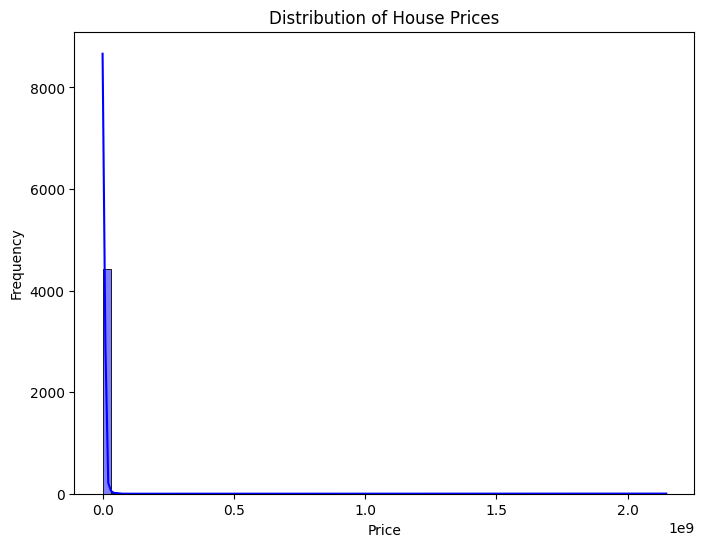

In [702]:
# plot the distribution of 'price'

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=67, kde=True, color='blue', edgecolor='black')

plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

Average Area (Square Foot)

In [703]:
# calculate the average area (square foot) (property size) 

average_area = df['area'].mean()

print(f'Average Area Size: {average_area:.2f} sq ft.')

Average Area Size: 2177.85 sq ft.


Average Price per Area

In [704]:
# calculate price per area 
df['price_per_area'] = df['price'] / df['area']
average_price_per_area = df['price_per_area'].mean()

print(f"Average Price per Area (Square Foot): ${average_price_per_area:,.2f}")

Average Price per Area (Square Foot): $841.41


Average Price per Bedroom

In [705]:
# calculate price per bedroom
df['price_per_bedroom'] = df['price'] / df['bedroom']
average_price_per_bedroom = df['price_per_bedroom'].mean()

print(f"Average Price per Bedroom: ${average_price_per_bedroom:,.2f}")

Average Price per Bedroom: $635,331.11


    Number of Bedrooms   Average Price
6                    7  $28,473,587.35
26                  50  $11,000,000.00
25                  42  $10,700,000.00
24                  40   $5,980,000.00
18                  20   $5,698,000.00
7                    8   $5,593,925.57
9                   10   $5,539,555.43
10                  11   $5,129,838.80
22                  35   $4,380,000.00
4                    5   $4,074,603.58
21                  32   $4,000,000.00
20                  30   $3,500,000.00
5                    6   $3,423,525.84
23                  36   $3,099,000.00
19                  24   $3,066,666.67
11                  12   $3,050,681.68
3                    4   $2,702,633.46
16                  18   $2,499,000.00
12                  13   $2,231,000.00
14                  15   $2,137,777.40
8                    9   $2,096,184.16
17                  19   $1,998,000.00
15                  16   $1,993,500.00
13                  14   $1,675,000.00
2                    3   

C:\Users\angel\AppData\Local\Temp\ipykernel_3152\3357985859.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"${x:,.0f}" for x in ax.get_yticks()])


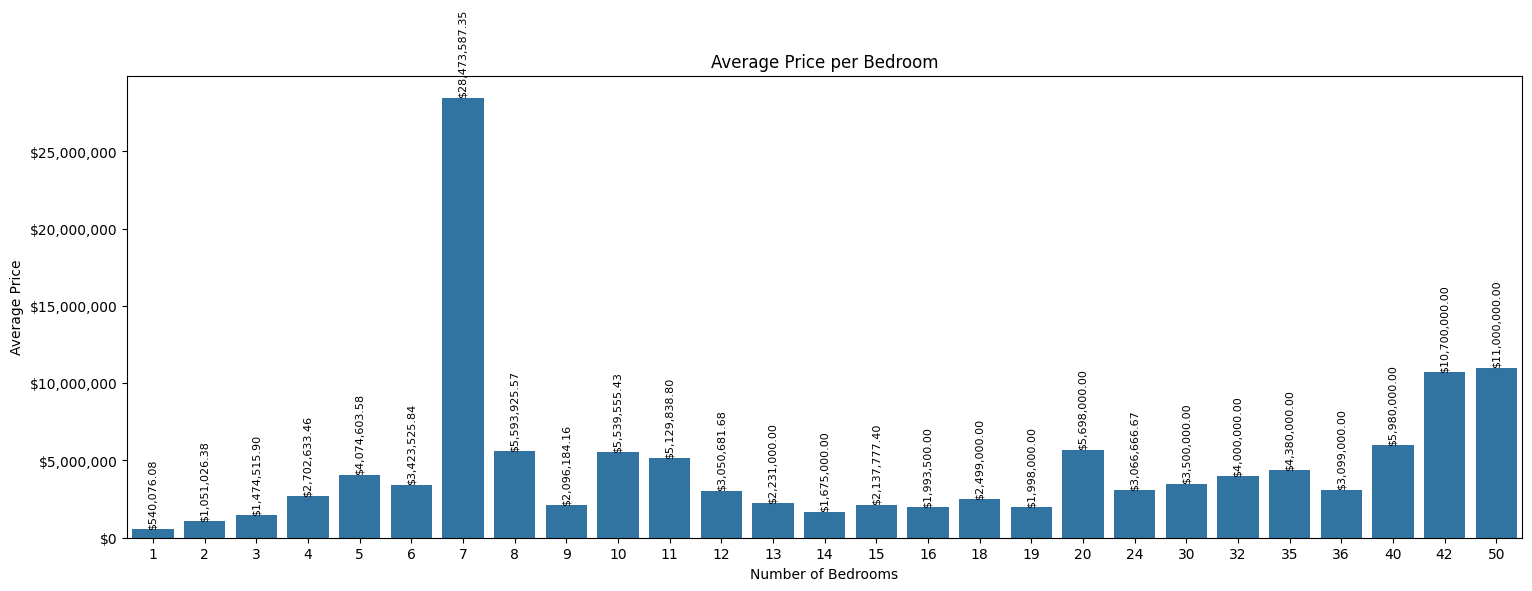

In [718]:
# group by 'bedroom' and calculate the average price
average_price_per_bedroom = df.groupby('bedroom')['price'].mean().reset_index()

# rename columns
average_price_per_bedroom.columns = ['Number of Bedrooms', 'Average Price']

# sort by 'Average Price' in descending order
average_price_per_bedroom = average_price_per_bedroom.sort_values(by='Average Price', ascending=False)

# format 'Average Price' as dollars with two decimal places for display
average_price_per_bedroom['Average Price'] = average_price_per_bedroom['Average Price'].apply(lambda x: f"${x:,.2f}")

print(average_price_per_bedroom)

# prepare data for plotting
plot_data = average_price_per_bedroom.copy()
plot_data['Average Price'] = plot_data['Average Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# plot the data
fig, ax = plt.subplots(figsize=(18, 6))
bar_plot = sns.barplot(data=plot_data, x='Number of Bedrooms', y='Average Price', ax=ax)

# set y-axis labels to dollar format
ax.set_yticklabels([f"${x:,.0f}" for x in ax.get_yticks()])

# add data labels
for p in bar_plot.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f"${height:,.2f}", 
            ha='center', va='bottom', rotation=90, fontsize=8)
plt.xticks(rotation=0)

# plot title
plt.title('Average Price per Bedroom')

plt.show()


Average Price per Bathroom

In [707]:
# calculate price per bath, handling zero values
df['price_per_bathroom'] = df.apply(lambda row: row['price'] / row['bathroom'] if row['bathroom'] != 0 else np.nan, axis=1)

# calculate the average price per bath, excluding NaN values
average_price_per_bathroom = df['price_per_bathroom'].mean()

print(f"Average Price per Bathroom: ${average_price_per_bathroom:,.2f}")

Average Price per Bathroom: $809,153.94


    Number of Bathrooms   Average Price
13                   13  $29,950,000.00
10                   10  $27,072,680.50
6                     6  $23,627,526.85
11                   11  $12,145,000.00
20                   50  $11,000,000.00
19                   43  $10,700,000.00
8                     8   $9,991,953.49
0                     0   $7,835,000.00
9                     9   $7,458,412.43
7                     7   $6,494,476.19
14                   16   $6,015,800.00
16                   20   $5,491,666.67
15                   17   $4,195,000.00
12                   12   $3,499,666.67
4                     4   $3,466,705.97
5                     5   $3,235,854.74
18                   32   $3,000,000.00
17                   24   $2,700,000.00
3                     3   $1,708,637.89
2                     2   $1,704,841.33
1                     1     $478,243.05


C:\Users\angel\AppData\Local\Temp\ipykernel_3152\3482510614.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"${x:,.0f}" for x in ax.get_yticks()])


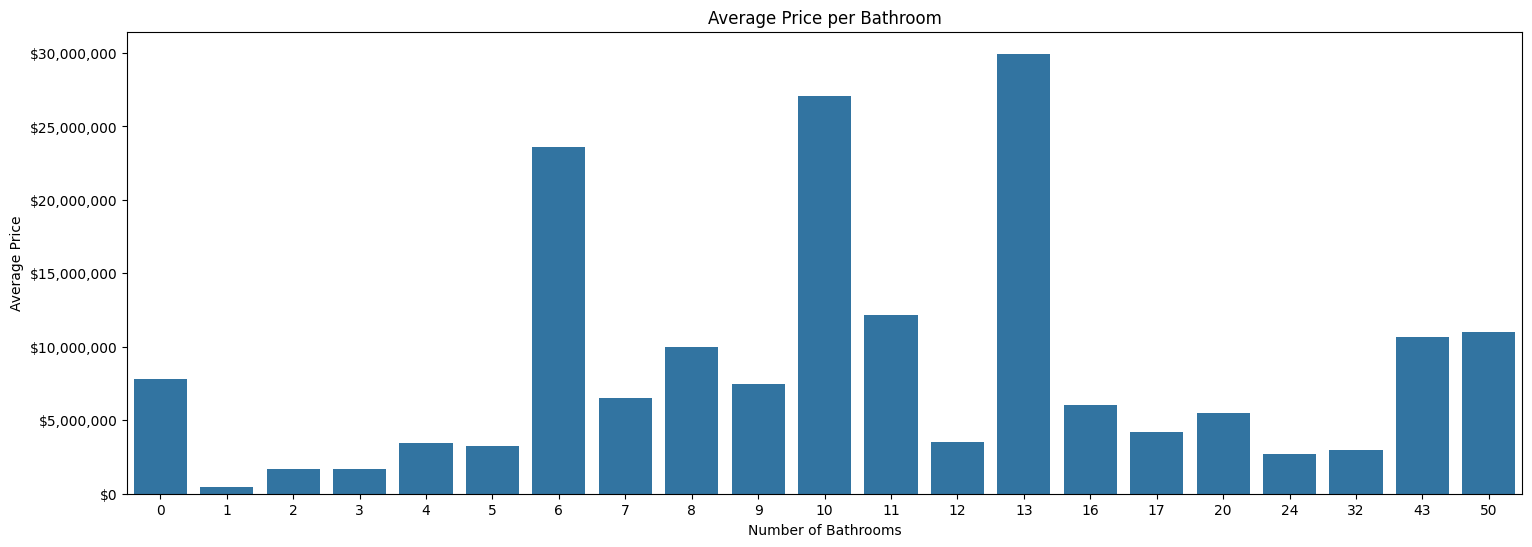

In [719]:
# group by 'bathroom' and calculate the average price
average_price_per_bathroom = df.groupby('bathroom')['price'].mean().reset_index()

# rename columns
average_price_per_bathroom.columns = ['Number of Bathrooms', 'Average Price']

# sort by 'Average Price' in descending order
average_price_per_bathroom = average_price_per_bathroom.sort_values(by='Average Price', ascending=False)

# format 'Average Price' as dollars with two decimal places for display
average_price_per_bathroom['Average Price'] = average_price_per_bathroom['Average Price'].apply(lambda x: f"${x:,.2f}")

print(average_price_per_bathroom)

# prepare data for plotting
plot_data = average_price_per_bathroom.copy()
plot_data['Average Price'] = plot_data['Average Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# plot the data
fig, ax = plt.subplots(figsize=(18, 6))
bar_plot = sns.barplot(data=plot_data, x='Number of Bathrooms', y='Average Price', ax=ax)

# set y-axis labels to dollar format
ax.set_yticklabels([f"${x:,.0f}" for x in ax.get_yticks()])

# plot title
plt.title('Average Price per Bathroom')

plt.show()

Average Price per Place

           Place  Average Price
0   Bronx County    $341,606.31
6  Staten Island    $449,264.40
5  Queens County    $460,560.45
1       Flatbush    $650,000.00
2   Kings County    $871,091.21
7  United States  $1,327,848.32
3      Manhattan  $2,737,330.93
4       New York  $3,251,557.30


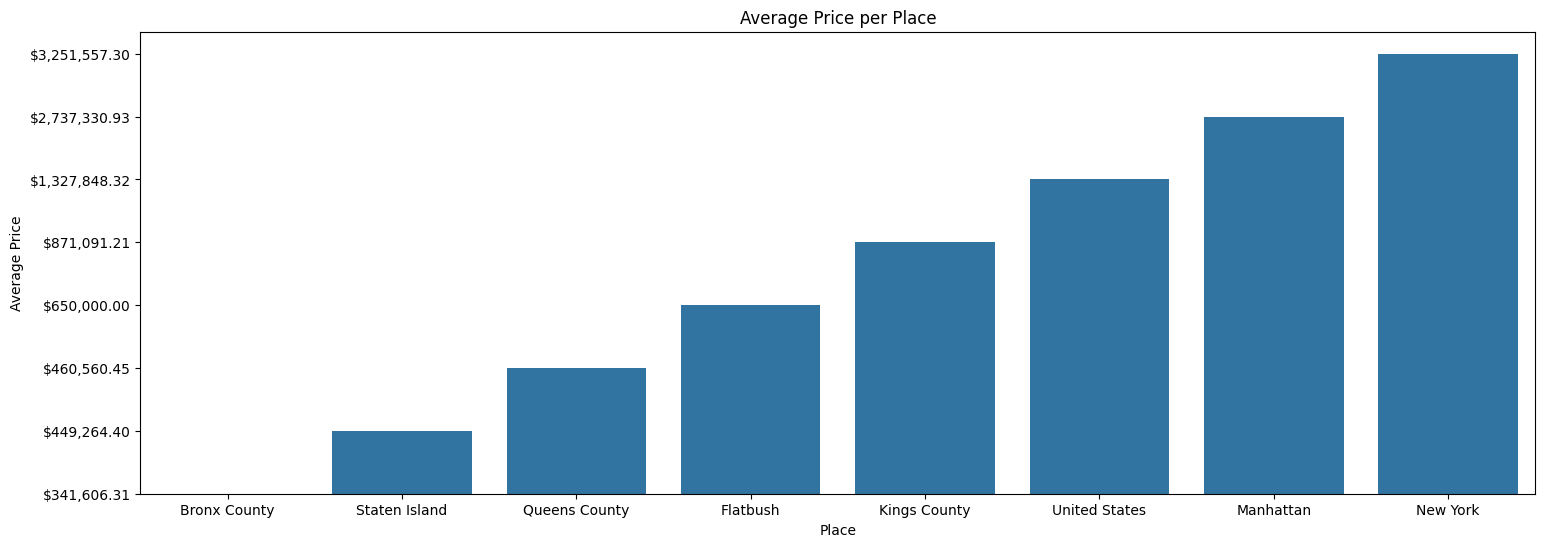

In [709]:
# group by 'place' and calculate the average price
average_price_per_place = df.groupby('place')['price'].mean().reset_index()

# rename columns
average_price_per_place.columns = ['Place', 'Average Price']

# sort by 'Average Price' in ascending order
average_price_per_place = average_price_per_place.sort_values(by='Average Price', ascending=True)

# format 'Average Price' as dollars with two decimal places
average_price_per_place['Average Price'] = average_price_per_place['Average Price'].apply(lambda x: f"${x:,.2f}")

print(average_price_per_place)

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(data=average_price_per_place, x='Place', y='Average Price', ax=ax)
ax.invert_yaxis()
plt.xticks(rotation=0)

# plot title
plt.title('Average Price per Place')

plt.show()



Average Price per Sublocality

         Sublocality  Average Price
12         Rego Park    $215,000.00
4         East Bronx    $265,000.00
13         Riverdale    $319,666.67
5           Flushing    $476,000.00
2       Coney Island    $511,333.33
6      Fort Hamilton    $599,000.00
1   Brooklyn Heights    $625,000.00
14     Snyder Avenue    $650,000.00
0       Bronx County    $769,484.82
11     Queens County    $844,276.32
7    Jackson Heights    $985,000.00
8       Kings County  $1,454,115.62
10          New York  $2,679,449.85
15     Staten Island  $5,056,329.45
3              Dumbo  $5,799,000.00
9          Manhattan  $9,731,312.02


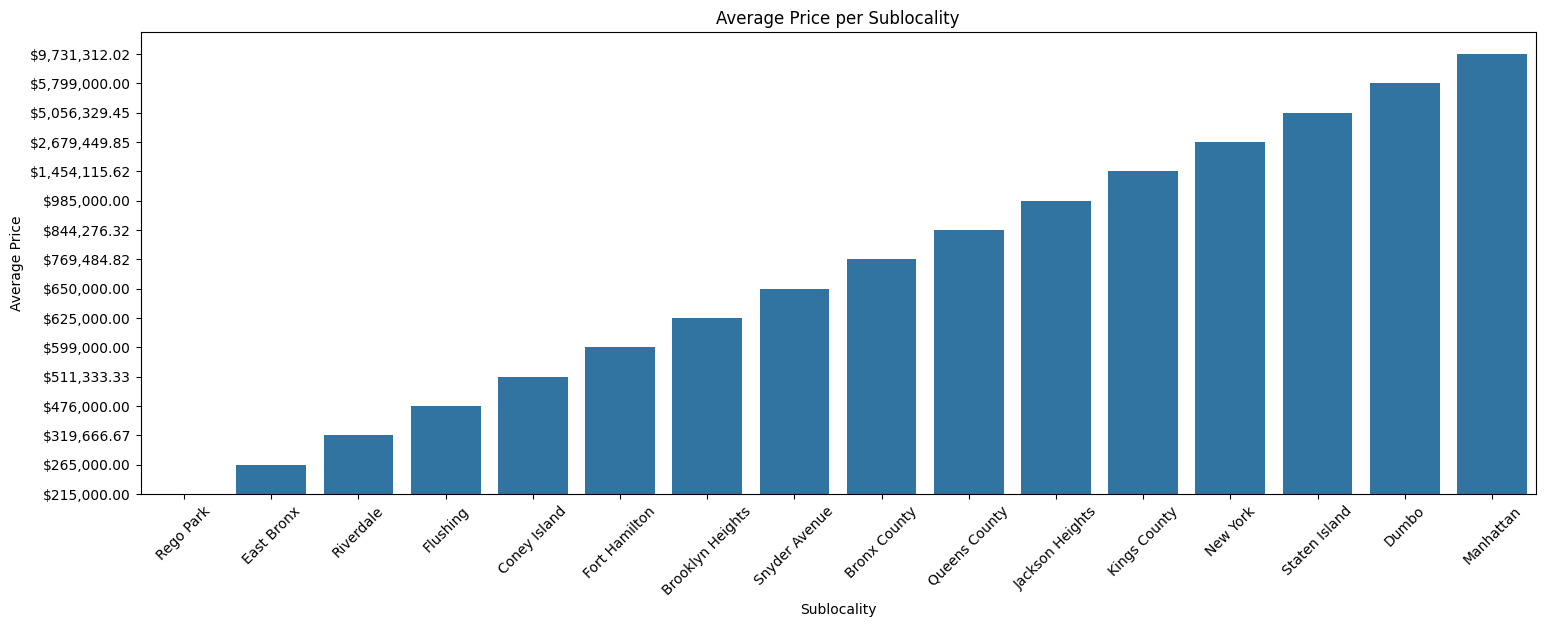

In [710]:
# group by 'sublocality' and calculate the average price
average_price_per_sublocality = df.groupby('sublocality')['price'].mean().reset_index()

# rename columns
average_price_per_sublocality.columns = ['Sublocality', 'Average Price']

# sort by 'Average Price' in ascending order
average_price_per_sublocality = average_price_per_sublocality.sort_values(by='Average Price', ascending=True)

# format 'Average Price' as dollars with two decimal places
average_price_per_sublocality['Average Price'] = average_price_per_sublocality['Average Price'].apply(lambda x: f"${x:,.2f}")

print(average_price_per_sublocality)

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(data=average_price_per_sublocality, x='Sublocality', y='Average Price', ax=ax)
ax.invert_yaxis()
plt.xticks(rotation=45)

# plot title
plt.title('Average Price per Sublocality')

plt.show()

Average Price per Type

                          Type  Average Price
4                   Contingent    $888,693.17
3              Condop For Sale    $967,000.00
0               Co-Op For Sale  $1,153,780.59
8                Land For Sale  $1,165,189.49
1                  Coming Soon  $1,172,000.00
9        Mobile House For Sale  $1,288,000.00
6                  Foreclosure  $1,343,010.36
11                     Pending  $1,357,920.01
10  Multi-Family Home For Sale  $1,672,043.30
5                     For Sale  $1,954,535.95
2               Condo For Sale  $2,620,805.81
7               House For Sale  $3,824,857.77
12          Townhouse For Sale  $6,406,234.17


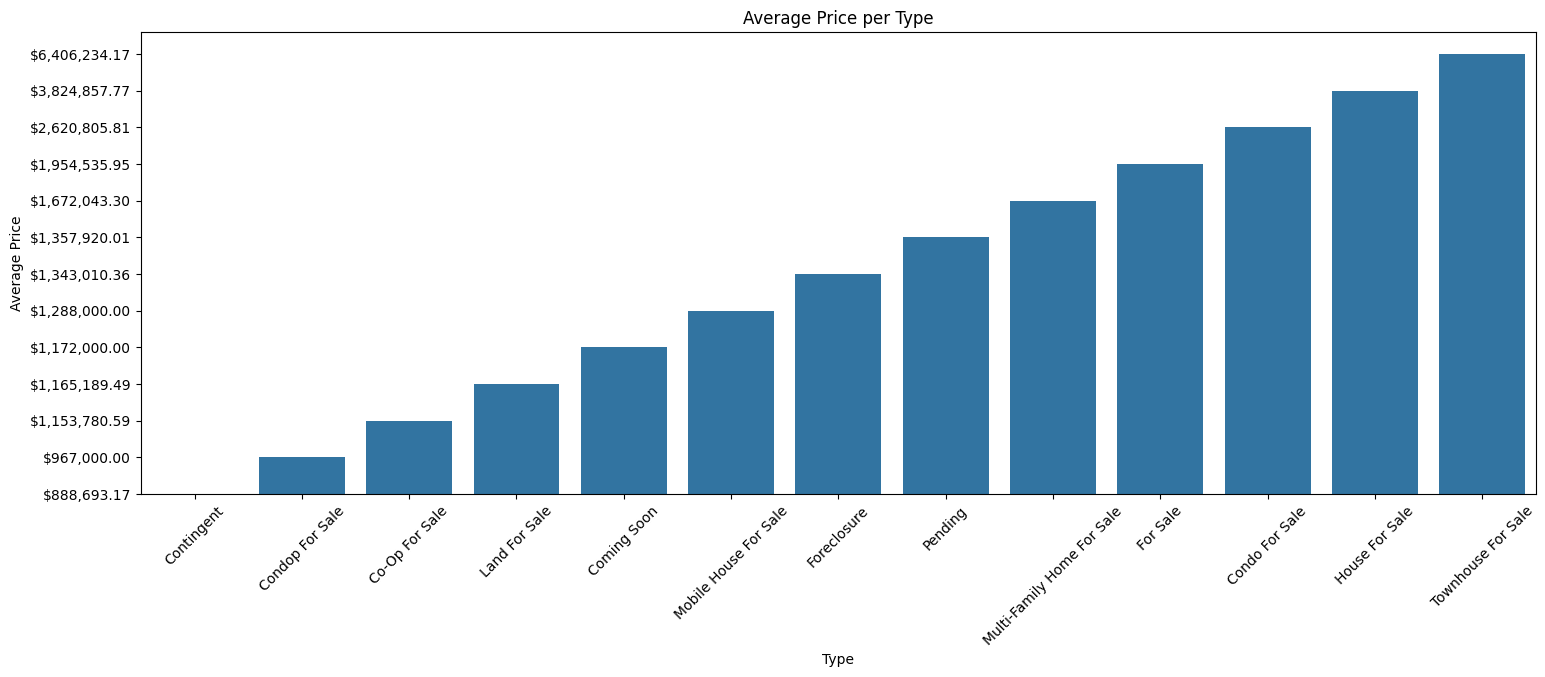

In [711]:
# group by 'type' and calculate the average price
average_price_per_type = df.groupby('type')['price'].mean().reset_index()

# rename columns
average_price_per_type.columns = ['Type', 'Average Price']

# sort by 'Average Price' in ascending order
average_price_per_type = average_price_per_type.sort_values(by='Average Price', ascending=True)

# format 'Average Price' as dollars with two decimal places
average_price_per_type['Average Price'] = average_price_per_type['Average Price'].apply(lambda x: f"${x:,.2f}")

print(average_price_per_type)

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(data=average_price_per_type, x='Type', y='Average Price', ax=ax)
ax.invert_yaxis()
plt.xticks(rotation=45)

# plot title
plt.title('Average Price per Type')

plt.show()

                          Type      Area
2               Condo For Sale  1,572.04
0               Co-Op For Sale  1,618.46
4                   Contingent  1,782.56
11                     Pending  2,075.93
5                     For Sale  2,116.48
8                Land For Sale  2,155.51
3              Condop For Sale  2,184.21
9        Mobile House For Sale  2,184.21
1                  Coming Soon  2,217.10
7               House For Sale  2,248.99
6                  Foreclosure  2,331.23
10  Multi-Family Home For Sale  3,214.16
12          Townhouse For Sale  3,887.51


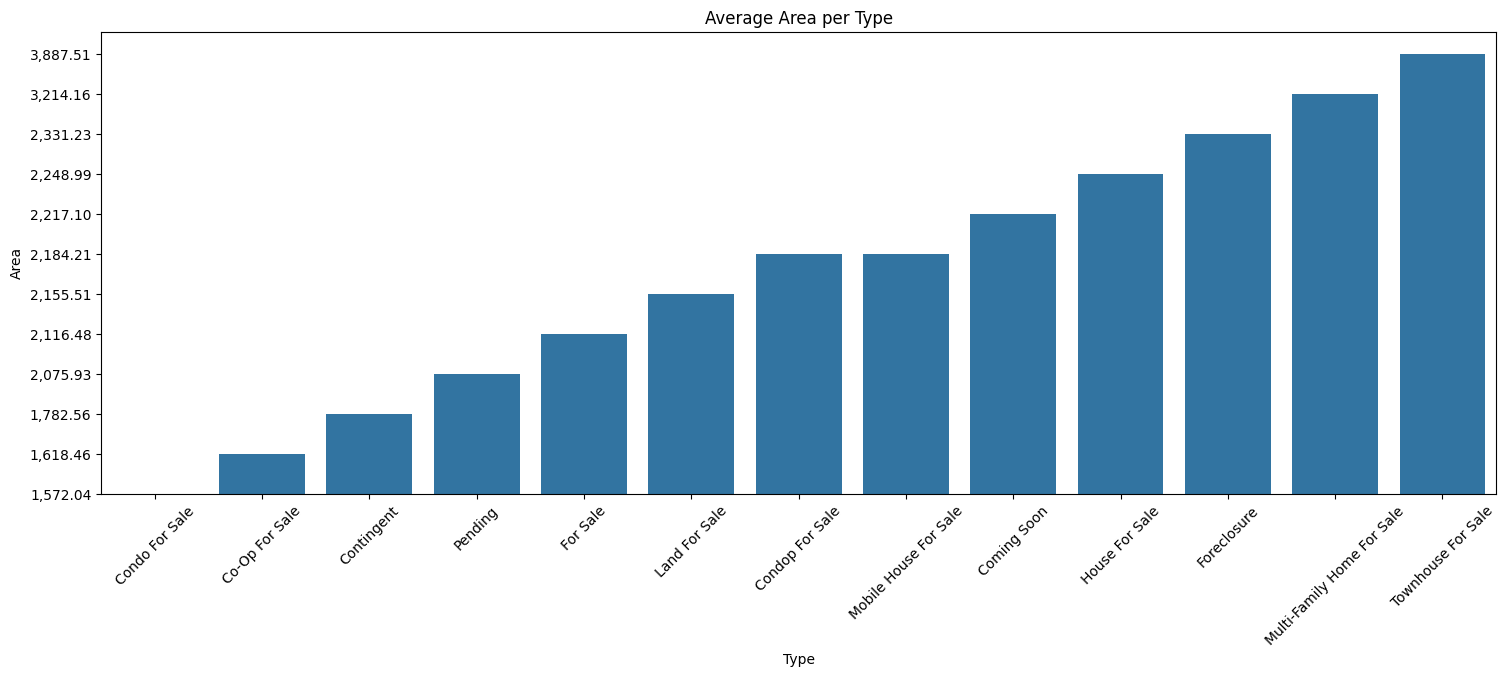

In [712]:
# group by 'type' and calculate the average area
average_area_per_type = df.groupby('type')['area'].mean().reset_index()

# rename columns
average_area_per_type.columns = ['Type', 'Area']

# sort by 'Area' in ascending order
average_area_per_type = average_area_per_type.sort_values(by='Area', ascending=True)

# format 'Area' with two decimal places
average_area_per_type['Area'] = average_area_per_type['Area'].apply(lambda x: f"{x:,.2f}")

print(average_area_per_type)

fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(data=average_area_per_type, x='Type', y='Area', ax=ax)
ax.invert_yaxis()
plt.xticks(rotation=45)

# plot title
plt.title('Average Area per Type')

plt.show()

Scatter plot of Price vs. Area (Square Footage)

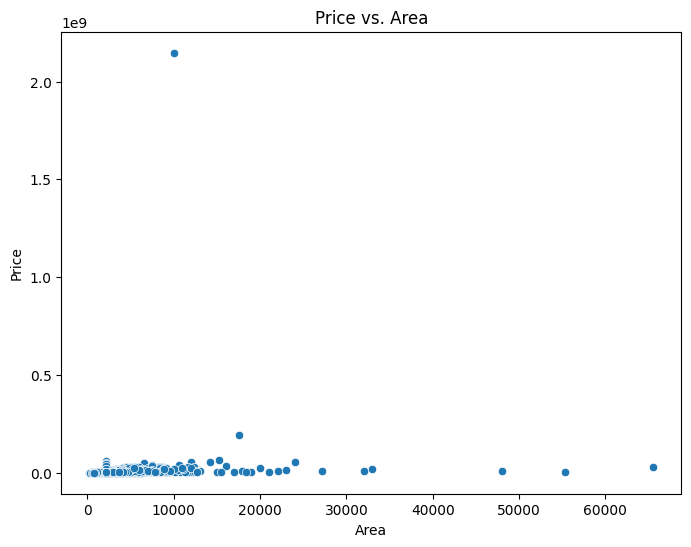

In [713]:
# scatter plot of price and area

plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Correlation Matrix and Heatmap with Price

             price   bedroom  bathroom      area
price     1.000000  0.051334  0.077382  0.115879
bedroom   0.051334  1.000000  0.771488  0.444773
bathroom  0.077382  0.771488  1.000000  0.501981
area      0.115879  0.444773  0.501981  1.000000

Correlations with 'price':
price       1.000000
bedroom     0.051334
bathroom    0.077382
area        0.115879
Name: price, dtype: float64


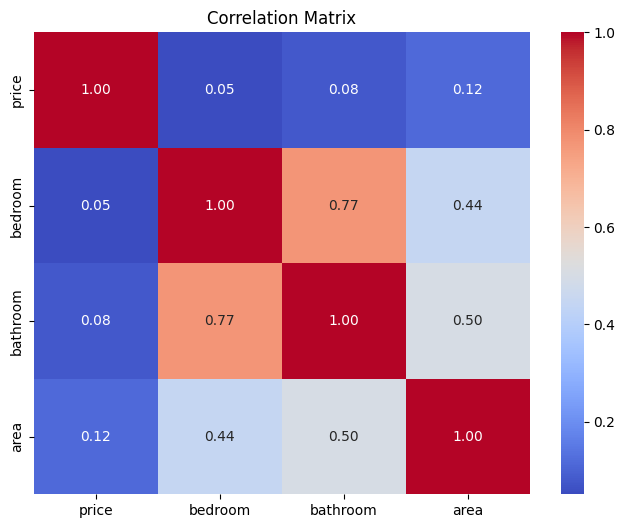

In [714]:
# calculate correlation matrix
selected_columns = ['price', 'bedroom', 'bathroom', 'area']
df_selected = df[selected_columns]
correlation_matrix = df_selected.corr()
print(correlation_matrix)

# look at correlations with 'price'
price_correlations = correlation_matrix['price']
print("\nCorrelations with 'price':")
print(price_correlations)

# plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()